In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Мы поместили наш who_suicide_statistic.csv в одну директорию с нашим основным файлом

In [2]:
stat = pd.read_csv("who_suicide_statistics.csv")

In [3]:
# Для использования этих цветов в диаграммах
color = ['black', 'orange', 'red', 'orange', 'gray', 'yellow']

In [4]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
age_c = \
    {
            '5-14 years': 0,
            '15-24 years': 1,
            '25-34 years': 2,
            '35-54 years': 3,
            '55-74 years': 4,
            '75+ years': 5
    }
gender_c = \
    {
        'female': 0,
        'male': 1
    }

In [6]:
stat['age_en'] = stat['age'].map(age_c)
stat['sex_en'] = stat['sex'].map(gender_c)

Заменили все пустые значения

In [7]:
stat.suicides_no.fillna(0, inplace=True)

Наш "декодер" для возрастных групп, которые
мы обозначили за цифры от 0 до 5

Text(0.5, 0, 'Возраст')

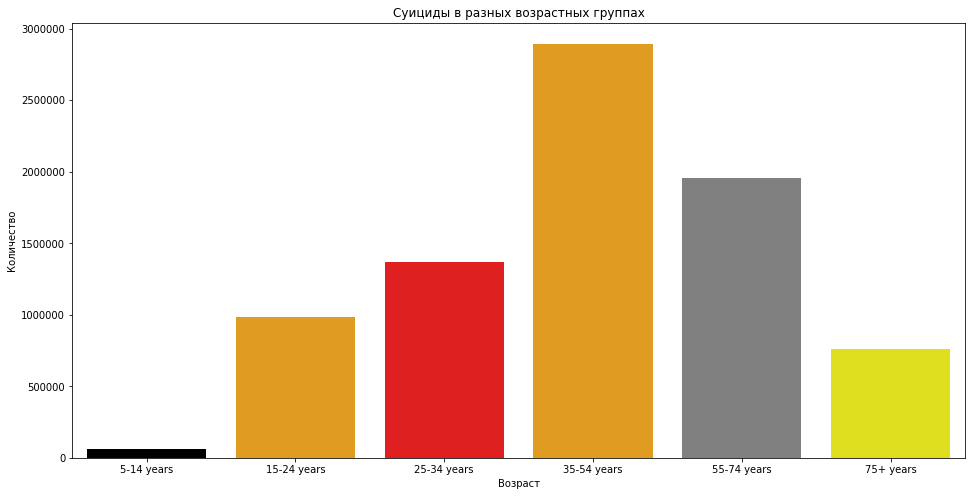

In [8]:
en = \
    {
        0: '5-14 years',
        1: '15-24 years',
        2: '25-34 years',
        3: '35-54 years',
        4: '55-74 years',
        5: '75+ years'
    }
gen = \
    {
        0: 'female',
        1: 'male'
    }

suicide = stat.groupby('age_en')[['suicides_no']].sum()
plt.figure(figsize=(16, 8))
sns.barplot(x=suicide.index.map(en.get), y=suicide.suicides_no, palette=color)
plt.title("Суициды в разных возрастных группах")
plt.ylabel("Количество")
plt.xlabel("Возраст")

Что дает нам понять - суициду больше подвержены люди в возрастной группе 35-54 года.
И последнее место замыкают подростки в возрасте от 5 до 14 лет, это неудивительно, потому что именно в этом возрасте у человека есть все возможности полностью наслаждаться жизнью, будучи чаще всего достаточно обеспеченным.
И удивительно то, что довольно часто заканчивают жизнь самоубийством пожилые люди (75+). Чем это может быть обусловлено? Первая причина, приходящая на ум - боязнь постареть и стать обузой для своих близких.

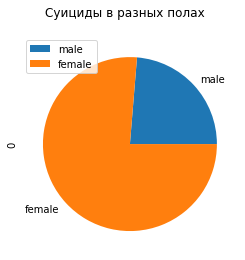

In [9]:
m_suicide = stat[stat.sex_en == 0]['suicides_no'].values.sum()
f_suicide = stat[stat.sex_en == 1]['suicides_no'].values.sum()
dif = pd.DataFrame([m_suicide, f_suicide], index=['male', 'female'])
dif.head()
dif.plot(kind='pie', subplots=True, title="Суициды в разных полах")
plt.legend()

На данной диаграмме мы видим, что количество суицидов у женщин превышает количество суицидов у мужчин более, чем в два раза

Диграмма с групировкой по годам и возрастным группам

In [ ]:
suicide_data = stat.groupby(['year', 'age']).sum()['suicides_no'].reset_index()
plt.figure(figsize=(16, 8))
sns.swarmplot(
    x='year',
    y='suicides_no',
    hue='age',
    data=suicide_data,
    palette=color)
plt.title("Суициды по возрастным группам и годам")
plt.ylabel("Количество")
plt.show()

Топ-20 стран по количеству суицидов с 1979 по 2016 г.
На первом месте находится Российская Федерация, за ней следуют Соединенные Штаты Америки. 
Это частично обуславливается тем, что в этих двух странах проживает очень большое количество людей.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002153D48E888>],
      dtype=object)

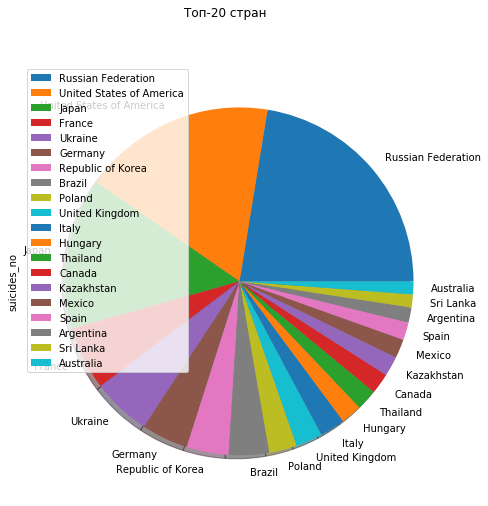

In [16]:
stat.groupby('country').sum().sort_values(
    by='suicides_no',
    ascending=False)[['suicides_no']][:20].plot(
    kind='pie',
    subplots=True,
    shadow=True,
    figsize=(16, 8),
    title='Топ-20 стран')

Самоубийства в год.

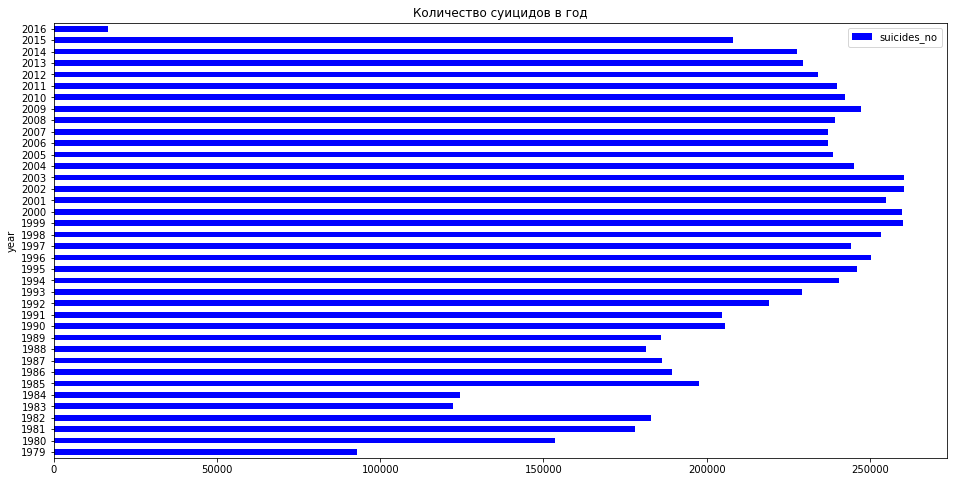

In [20]:
stat.groupby("year").sum().sort_values(
    by='year',
    ascending=True)[['suicides_no']].plot(
    kind='barh',
    figsize=(16, 8),
    color='blue',
    title='Количество суицидов в год')

По продолжающейся тендеции видно, что с 2009 года количество самоубийств начало падать, что привело к большой пропасти между 2009 и 2016 годами. В 2016 году было зафиксировано наименьшее количество суицидов. Сохранится ли данная тенденция и далее? В наш век развивающихся индустрий и технологий каждый может найти себе "родное место". В сравнении с сегодняшним днем, люди раньше были подвержены скуке и постоянной нужде в деньгах. Сейчас же, засчет роста количества новых профессий и появления технологий, растет соответственно потребность в специалистах. Это один из немногих факторов, который, на мой взгляд, должен привести к остановке роста числа людей, покончивших жизнь самоубийством.